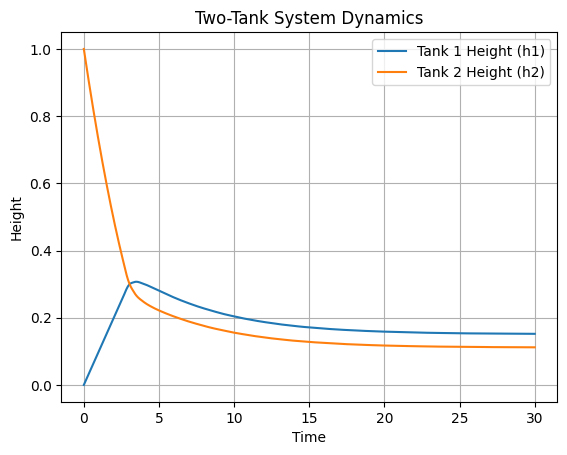

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters
A1 = 1.0      # Area of tank 1
A2 = 1.0      # Area of tank 2
k1 = 0.5      # Flow coefficient from tank 1 to tank 2
k2 = 0.3      # Outflow coefficient from tank 2

# Inflow function (can be modified)
def q_in(t):
    return 0.1  # Constant inflow, or e.g., 1.0 + 0.5*np.sin(t)

# System of ODEs
def two_tank_ode(t, h):
    h1, h2 = h
    h1 = max(h1, 0.0)  # prevent negative heights
    h2 = max(h2, 0.0)

    flow12 = k1 * np.sqrt(max(h1 - h2, 0))
    outflow = k2 * np.sqrt(h2)

    dh1dt = (q_in(t) - flow12) / A1
    dh2dt = (flow12 - outflow) / A2

    return [dh1dt, dh2dt]

# Initial conditions
h0 = [0.0, 1.0]  # Initial heights in both tanks

# Time span
t_span = (0, 30)
t_eval = np.linspace(*t_span, 1000)

# Solve ODE
sol = solve_ivp(two_tank_ode, t_span, h0, t_eval=t_eval, method='RK45')

# Plotting
plt.plot(sol.t, sol.y[0], label='Tank 1 Height (h1)')
plt.plot(sol.t, sol.y[1], label='Tank 2 Height (h2)')
plt.xlabel('Time')
plt.ylabel('Height')
plt.title('Two-Tank System Dynamics')
plt.legend()
plt.grid(True)
plt.show()


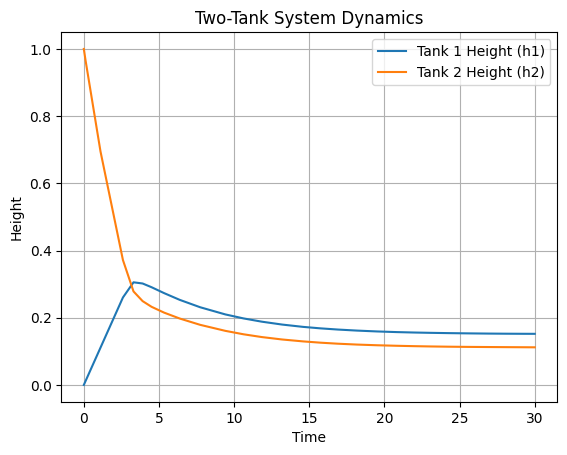

In [3]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters
A1 = 1.0      # Area of tank 1
A2 = 1.0      # Area of tank 2
k1 = 0.5      # Flow coefficient from tank 1 to tank 2
k2 = 0.3      # Outflow coefficient from tank 2

# Inflow function (can be modified)
def q_in(t):
    return 0.1  # Constant inflow, or e.g., 1.0 + 0.5*np.sin(t)

# System of ODEs
def two_tank_ode(t, h):
    h1, h2 = h
    h1 = max(h1, 0.0)  # prevent negative heights
    h2 = max(h2, 0.0)

    flow12 = k1 * np.sqrt(max(h1 - h2, 0))
    outflow = k2 * np.sqrt(h2)

    dh1dt = (q_in(t) - flow12) / A1
    dh2dt = (flow12 - outflow) / A2

    return [dh1dt, dh2dt]

# Initial conditions
h0 = [0.0, 1.0]  # Initial heights in both tanks

# Time span
t_span = (0, 30)
t_eval = np.arange(t_span[0], t_span[1] + 1, 1)

# Solve ODE
sol = solve_ivp(two_tank_ode, t_span, h0, method='RK45')

# Plotting
plt.plot(sol.t, sol.y[0], label='Tank 1 Height (h1)')
plt.plot(sol.t, sol.y[1], label='Tank 2 Height (h2)')
plt.xlabel('Time')
plt.ylabel('Height')
plt.title('Two-Tank System Dynamics')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
import src.models as models
%load_ext autoreload
%autoreload 2

Models imported succesfully


In [5]:
TT = models.TwoTanks(True)

In [6]:
TT.describe()

Model Name:  Two Tank System with Interaction


In [7]:
u1 = np.ones(100)*1.0
u2 = np.ones(100)*0.0
Ts = 1
h10, h20 = 0.0, 1.0
y0 = [h10, h20]
u = np.column_stack((u1, u2))
res = TT.simulate(y0, u, Ts)

In [8]:
import pandas as pd


In [11]:
res

{'Y': array([[ 1.04826982,  0.69031825],
        [ 1.65710037,  0.82252016],
        [ 2.15982531,  1.03162795],
        [ 2.60370913,  1.26646698],
        [ 3.00776281,  1.50914139],
        [ 3.38203088,  1.75186608],
        [ 3.73258175,  1.99094346],
        [ 4.06341377,  2.22457204],
        [ 4.3773339 ,  2.45190471],
        [ 4.67641276,  2.6725995 ],
        [ 4.96224016,  2.88658941],
        [ 5.23607749,  3.09395848],
        [ 5.4989532 ,  3.29487257],
        [ 5.75172498,  3.48953983],
        [ 5.9951217 ,  3.67818766],
        [ 6.22977257,  3.8610494 ],
        [ 6.45622801,  4.03835647],
        [ 6.67497484,  4.21033403],
        [ 6.88644769,  4.37719859],
        [ 7.09103777,  4.53915686],
        [ 7.28909955,  4.69640533],
        [ 7.48095619,  4.84913035],
        [ 7.66690381,  4.9975084 ],
        [ 7.84721498,  5.1417065 ],
        [ 8.0221416 ,  5.28188278],
        [ 8.19191731,  5.41818695],
        [ 8.35675953,  5.55076085],
        [ 8.51687113,  

In [10]:
df = pd.DataFrame(res)
df.head()

ValueError: Per-column arrays must each be 1-dimensional

In [12]:
df["h1"].plot()

NameError: name 'df' is not defined

In [13]:
df["h2"].plot()

NameError: name 'df' is not defined

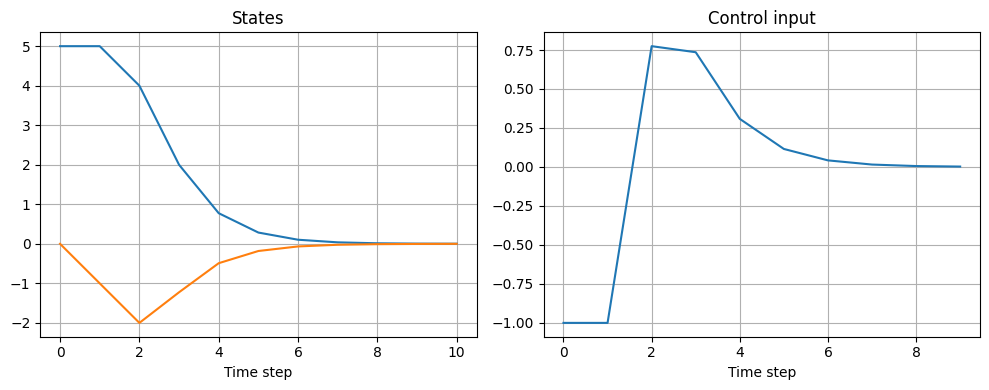

In [14]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# System definition
A = np.array([[1.0, 1.0],
              [0.0, 1.0]])
B = np.array([[0.0],
              [1.0]])
n, m = B.shape  # state and input dimensions

# MPC parameters
N = 10  # Horizon length
Q = np.eye(n)   # State cost
R = 0.1 * np.eye(m)  # Control cost

# Constraints
u_min, u_max = -1.0, 1.0
x_min, x_max = -10.0, 10.0

# Initial state
x0 = np.array([5.0, 0.0])

# Define optimization variables
x = cp.Variable((n, N+1))
u = cp.Variable((m, N))

# Define cost and constraints
cost = 0
constraints = [x[:, 0] == x0]
for k in range(N):
    cost += cp.quad_form(x[:, k], Q) + cp.quad_form(u[:, k], R)
    constraints += [x[:, k+1] == A @ x[:, k] + B @ u[:, k]]
    constraints += [u_min <= u[:, k], u[:, k] <= u_max]
    constraints += [x_min <= x[:, k], x[:, k] <= x_max]

# Optional terminal cost
cost += cp.quad_form(x[:, N], Q)

# Solve the problem
problem = cp.Problem(cp.Minimize(cost), constraints)
problem.solve()

# Plot results
x_vals = x.value
u_vals = u.value

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(x_vals.T)
plt.title("States")
plt.xlabel("Time step")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(u_vals[0])
plt.title("Control input")
plt.xlabel("Time step")
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
u_vals[0]

array([-1.        , -1.        ,  0.77457172,  0.7357167 ,  0.30831154,
        0.11542033,  0.04213131,  0.0153514 ,  0.00576539,  0.00248328])

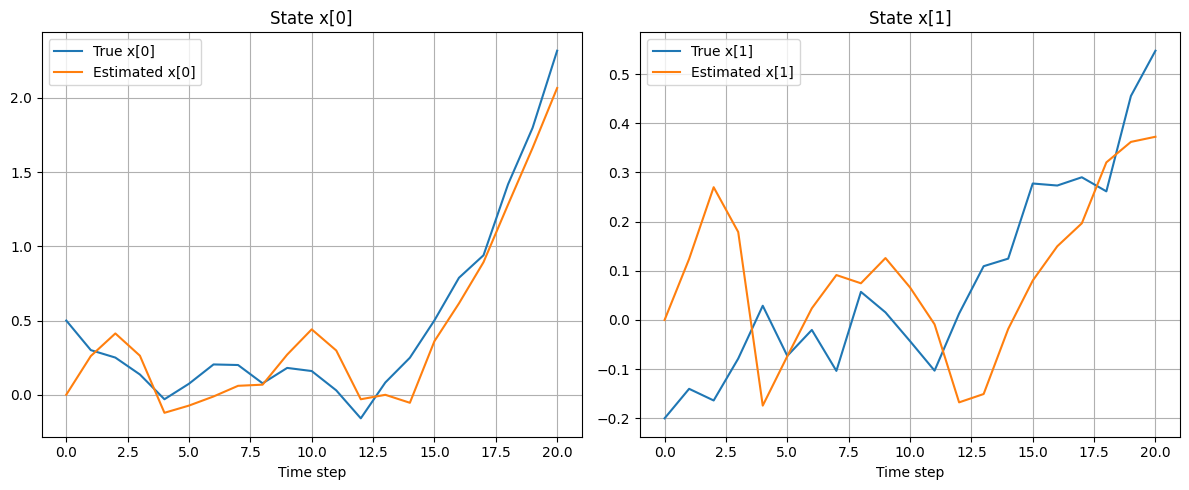

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# System dimensions
n = 2  # state dimension
m = 1  # input dimension
p = 2  # measurement dimension

# Linear system matrices (constant)
A = np.array([[1.0, 1.0],
              [0.0, 1.0]])
B = np.array([[0.0],
              [1.0]])

# Nonlinear measurement function
def h(x):
    return np.array([
        np.sin(x[0]),
        np.log1p(np.abs(x[1]))
    ])

# Jacobian of h(x)
def evaluate_jacobian_h(x):
    H = np.zeros((2, len(x)))
    H[0, 0] = np.cos(x[0])
    H[1, 1] = 1 / (1 + np.abs(x[1])) * np.sign(x[1]) if x[1] != 0 else 0
    return H

# Simulation parameters
T = 20  # number of steps
x_true = np.zeros((n, T+1))
x_est = np.zeros((n, T+1))
P_est = np.zeros((n, n, T+1))
y_meas = np.zeros((p, T))
u_seq = np.zeros((m, T))  # constant zero input

# Initial state and covariance
x_true[:, 0] = np.array([0.5, -0.2])
x_est[:, 0] = np.array([0.0, 0.0])
P_est[:, :, 0] = np.eye(n) * 0.1

# Noise covariances
Q = np.eye(n) * 0.01  # process noise
R = np.eye(p) * 0.05  # measurement noise

# Simulate and apply EKF
for k in range(T):
    # --- Simulate true system ---
    w_k = np.random.multivariate_normal(np.zeros(n), Q)
    x_true[:, k+1] = A @ x_true[:, k] + B @ u_seq[:, k] + w_k

    # --- Generate noisy measurement ---
    v_k = np.random.multivariate_normal(np.zeros(p), R)
    y_meas[:, k] = h(x_true[:, k+1]) + v_k

    # --- EKF Predict ---
    x_pred = A @ x_est[:, k] + B @ u_seq[:, k]
    P_pred = A @ P_est[:, :, k] @ A.T + Q

    # --- EKF Update ---
    H = evaluate_jacobian_h(x_pred)
    y_pred = h(x_pred)
    S = H @ P_pred @ H.T + R
    K = P_pred @ H.T @ np.linalg.inv(S)
    x_est[:, k+1] = x_pred + K @ (y_meas[:, k] - y_pred)
    P_est[:, :, k+1] = (np.eye(n) - K @ H) @ P_pred

# --- Plot results ---
time = np.arange(T+1)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(time, x_true[0], label="True x[0]")
plt.plot(time, x_est[0], label="Estimated x[0]")
plt.title("State x[0]")
plt.xlabel("Time step")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(time, x_true[1], label="True x[1]")
plt.plot(time, x_est[1], label="Estimated x[1]")
plt.title("State x[1]")
plt.xlabel("Time step")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
